# 1.Problem 
The problem is a regression problem from kaggle.
https://www.kaggle.com/c/allstate-claims-severity/data

# 2. Data 
The data is taken from kaggle.
https://www.kaggle.com/c/allstate-claims-severity/data

# 3. Evaluation
The evaluation is based on mean absolute error.And the error would be better to become less as much as possible.

# 4.Features
* Each row in this dataset represents an insurance claim. You must predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

* File descriptions
* train.csv - the training set
* test.csv - the test set. You must predict the loss value for the ids in this file.
* sample_submission.csv - a sample submission file in the correct format

In [1]:
## Getting tools ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing the data
train=pd.read_csv("train.csv")

In [3]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### EXPLORATORY DATA ANALYSIS

In [5]:
## Watching info about train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
## Getting columns of train data
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [7]:
## Knowing counts of all category of data in columns cat1
train["cat1"].value_counts()

A    141550
B     46768
Name: cat1, dtype: int64

In [8]:
train["cont1"].value_counts()

0.475784    5862
0.503312    3257
0.325401    2980
0.546670    2902
0.330514    2742
            ... 
0.385068       1
0.224541       1
0.714621       1
0.072036       1
0.852335       1
Name: cont1, Length: 647, dtype: int64

In [9]:
train["loss"]

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

#### Visualizing the data

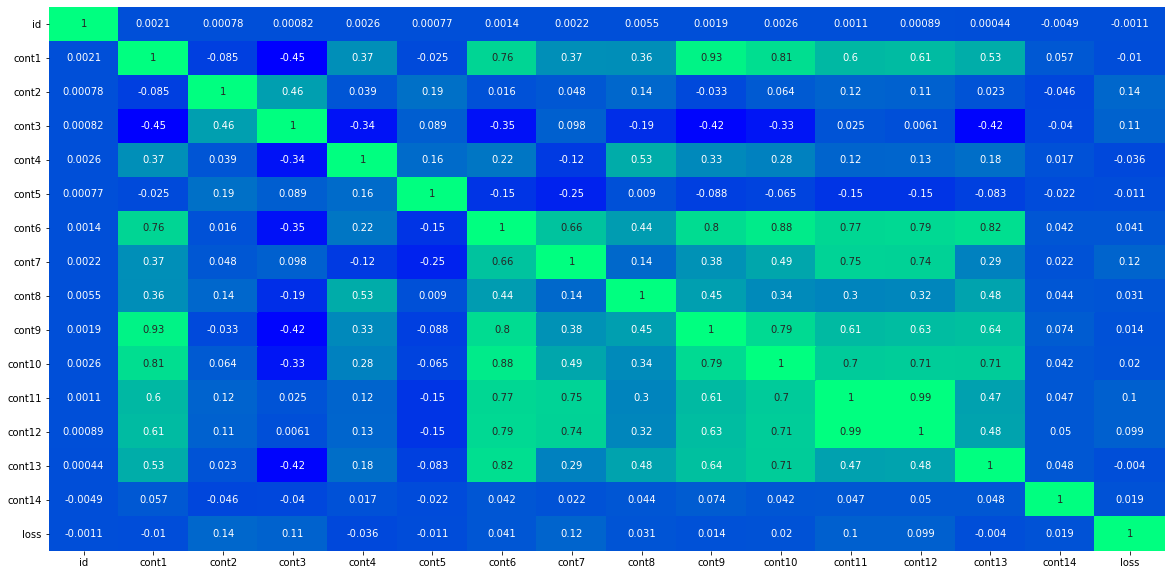

In [12]:
import seaborn as sns
correlation=train.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(correlation,
              annot=True,
              cmap="winter",
              cbar=False)

In [5]:
## COpying the data into new variable 
tmp=train.copy()

# Preprocessing the data

In [11]:
## CHecking whether the data has null value or not
tmp.isna().sum().sum()

0

In [12]:
##Checking the type of data in train datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
## Creating a function to preprocess the data
def preprocess(data):
    for label,content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]=content.astype("category").cat.as_ordered()
            data[label]=pd.Categorical(content).codes
    return data
        

In [14]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [7]:
## Preprocess the train data
tmp=preprocess(tmp)

In [8]:
## watching the preprocessed data
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int16(2), int64(1), int8(114)
memory usage: 44.2 MB


In [17]:
tmp.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


## MODELLING AND TESTING ON DIFFERENT MODELS

In [9]:
## importing models to use for experimenting
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


### Splitting the data into train and test

In [19]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int16(2), int64(1), int8(114)
memory usage: 44.2 MB


In [10]:
from sklearn.model_selection import train_test_split
np.random.seed(100)
X=tmp.drop("loss",axis=1)
y=tmp["loss"]
X_train,X_valid,y_train,y_valid=train_test_split(X[:10000],
                                                 y[:10000],
                                                 test_size=0.3,
                                                  shuffle=True)

In [21]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((7000, 131), (7000,), (3000, 131), (3000,))

In [11]:
## Making a dictionary of models

models={"LinearRegression":LinearRegression(),
       "RandomForestRegressor":RandomForestRegressor(),
       "GradientBoost":GradientBoostingRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor()
       }

In [12]:
## Creating a function that can train on data and return the evaluation metrics
results={}
from sklearn.metrics import mean_absolute_error
def fit_and_score(models,X_train,y_train,X_valid,y_valid):
    '''
    fit and score on the model
    '''
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        results[model_name+" accuracy"]=model.score(X_valid,y_valid)
        y_pred=model.predict(X_valid)
        results[model_name+" mean_error"]=mean_absolute_error(y_valid,y_pred)
    

In [27]:
fit_and_score(models,X_train,y_train,X_valid,y_valid)

In [28]:
results

{'LinearRegression accuracy': 0.474486376538879,
 'LinearRegression mean_error': 1353.4925501503662,
 'RandomForestRegressor accuracy': 0.47359780930214024,
 'RandomForestRegressor mean_error': 1341.5535386666668,
 'GradientBoost accuracy': 0.5045222516231714,
 'GradientBoost mean_error': 1297.520635411841,
 'AdaBoostRegressor accuracy': -0.559842677703015,
 'AdaBoostRegressor mean_error': 3197.5038323948247}

In [58]:
tmp.to_csv("pre_to_csv.csv",index=False)

In [26]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int16(2), int64(1), int8(114)
memory usage: 44.2 MB


## Preprocessing the data using pandas dummies  and checking the results


In [28]:
dum=train.copy()

In [30]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [29]:
dum.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [31]:
dummies=pd.get_dummies(dum.drop("loss",axis=1))
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 1154 entries, id to cat116_Y
dtypes: float64(14), int64(1), uint8(1139)
memory usage: 226.1 MB


In [32]:
label_dum=dum["loss"]

In [35]:
## Splitting the data
X_dum_train,X_dum_test,y_dum_train,y_dum_test=train_test_split(dummies[:10000],label_dum[:10000],test_size=0.3)

In [36]:
fit_and_score(models,X_dum_train,y_dum_train,X_dum_test,y_dum_test)

In [37]:
results

{'LinearRegression accuracy': -223641340225.58954,
 'LinearRegression mean_error': 64678987.65160356,
 'RandomForestRegressor accuracy': 0.4754345102418752,
 'RandomForestRegressor mean_error': 1357.9215916,
 'GradientBoost accuracy': 0.5065121567798474,
 'GradientBoost mean_error': 1315.133177204506,
 'AdaBoostRegressor accuracy': 0.24574085459334172,
 'AdaBoostRegressor mean_error': 1984.0292962682538}

## Hypertuning different models

### 1.GradientBoostingRegressor

In [38]:
feature=tmp.drop("loss",axis=1)
label=tmp["loss"]

In [39]:
%timeit
gradient=GradientBoostingRegressor()
gradient.fit(feature,label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
mean_absolute_error(y_valid,gradient.predict(X_valid))

1237.0072813806687

In [10]:
## Using GridSearchCV to fine tune the models
from sklearn.model_selection import GridSearchCV

In [11]:
## Hypertuning the model using gridsearchcv
%timeit
np.random.seed(100)
grid= {#'min_samples_split':[2,4], 
       #'min_samples_leaf':[1,2],
       #'max_depth':[3],
       #'max_features':[None,'sqrt'],
       #"criterion":['mae'],
       #"learning_rate":[0.02],
       "n_estimators":[100,150,200]
      }
gradient=GridSearchCV(GradientBoostingRegressor(),
                     param_grid=grid,
                     n_jobs=-1,
                     #cv=5
                     )


In [ ]:
gradient.fit(X_train,y_train)

In [ ]:
gradient.best_params_

## 2.RandomForestRegressor

In [19]:
from sklearn.model_selection import GridSearchCV

In [23]:
np.random.seed(100)
param_grid={"criterion":["mae"],
           "n_estimators":[100,150,200],
           "min_samples_split":[2,4],
           "max_features":[None,"sqrt"]}
grid_random=GridSearchCV(RandomForestRegressor(),
                         param_grid=param_grid,
                         cv=3,
    
                         verbose=True
                    )

In [35]:
X_train,X_valid,y_train,y_valid=train_test_split(X[:4000],y[:4000],
                                               test_size=0.2
                                               )

In [36]:
for i in range(100,350,50):
    model=RandomForestRegressor(n_estimators=i)
    model.fit(X_train,y_train)
    print(f"i-estimator:accuracy:{model.score(X_valid,y_valid)}")
    print(f"i-estimator:mean_absolute_error:{mean_absolute_error(y_valid,model.predict(X_valid))}")

i-estimator:accuracy:0.44590762976650955
i-estimator:mean_absolute_error:1385.5938128750004
i-estimator:accuracy:0.43368870943062054
i-estimator:mean_absolute_error:1386.50030575
i-estimator:accuracy:0.43047385547628847
i-estimator:mean_absolute_error:1389.427842625
i-estimator:accuracy:0.44052308982517896
i-estimator:mean_absolute_error:1382.1716607500002
i-estimator:accuracy:0.4317594769497365
i-estimator:mean_absolute_error:1384.5674422083332


## Prediciting on test data which has been preprocessed in another notebook

In [49]:
## Importing test_data
tes_import=pd.read_csv("test_processsed.csv")

In [50]:
tes_import.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,4,1,2,1,1,1,1,1,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,1,6,1,2,1,2,1,1,1,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,2,9,1,2,1,2,2,1,2,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,3,12,1,1,1,1,2,1,1,1,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,4,15,2,1,1,1,1,2,1,1,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [52]:
## Deleting the unwanted column from test
tes_import.drop("Unnamed: 0",axis=1,inplace=True)

In [53]:
## Predicting on test data
predicted=gradient.predict(tes_import)

In [62]:
## making a new dataframe to submit on kaggle
Submit_csv=pd.DataFrame(columns=["id","loss"])

In [63]:
Submit_csv["id"],Submit_csv["loss"]=tes_import["id"],predicted

In [64]:
Submit_csv

,id,loss
0,4,6867.756666
1,6,9112.227691
2,9,12325.155835
3,12,11673.260857
4,15,7567.248987
...,...,...
125541,587617,7916.411837
125542,587621,8289.584542
125543,587627,10932.012072
125544,587629,7166.608100


In [65]:
## exporting the data
Submit_csv.to_csv("submit_gradient.csv",index=False)